In [2]:
import cv2 
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [108]:
!ls

0.png	16.png	1.png  4.png  6.png		 ddd.jpg
15.png	1.jpg	2.png  5.png  chess calib.ipynb


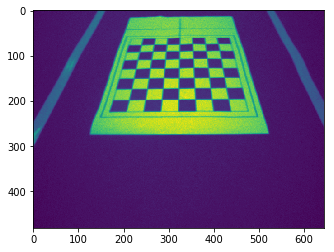

In [12]:
plt.imshow(img)


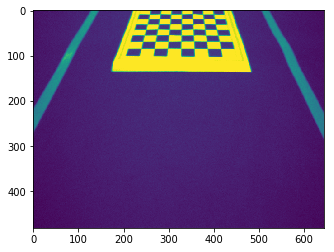

In [15]:
plt.imshow(gray)


In [34]:
img = cv2.imread("1.jpg", 0)
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(img, (6,4),None)

# If found, add object points, image points (after refining them)
if ret == True:
    #objpoints.append(objp)

    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    #imgpoints.append(corners2)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
    #cv2.imshow('img',img)
    #cv2.waitKey(500)

NameError: name 'criteria' is not defined

In [31]:
ret

False

In [35]:
np.save("corenrs.npy", corners)

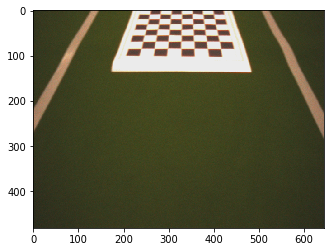

In [13]:
plt.imshow(img)


In [54]:



# Make a list of calibration images
img = cv2.imread("1.jpg", 0)
# Step through the list and search for chessboard corners
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(img, (6,4), None)

# If found, add object points, image points
if ret == True:
    print("YES")
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (6,4), corners[:4], ret)
    write_name = 'corners_found.jpg'
    cv2.imwrite(write_name, img)


YES


In [64]:
cv2.cornerSubPix(img, corners, (11, 11),(-1, -1), TermCriteria(CV_TERMCRIT_EPS + CV_TERMCRIT_ITER, 30, 0.1))

AttributeError: module 'cv2.cv2' has no attribute 'TermCriteria'

In [52]:
corners[:4]

array([[[ 228.37272644,  485.99624634]],

       [[ 276.58190918,  482.67178345]],

       [[ 325.07666016,  483.67163086]],

       [[ 373.28952026,  481.93600464]]], dtype=float32)

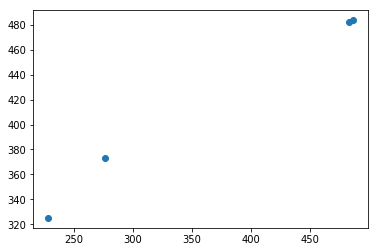

In [56]:
pts = corners[:4]
pts = pts.reshape((2,4))
plt.scatter(pts[0], pts[1])

In [3]:
for i in range(1,6):    
    for nx in range(3,8):
        for ny in range(3,8):
            img = cv2.imread(str(i)+".png", 0)
            ret, corners = cv2.findChessboardCorners(img, (nx, ny), None)
            if ret == True:
                print(i,nx,ny)

                # If we found corners, draw them! (just for fun)
                #cv2.drawChessboardCorners(img, (6,4), corners, ret)
                # Choose offset from image corners to plot detected corners
                # This should be chosen to present the result at the proper aspect ratio
                # My choice of 100 pixels is not exact, but close enough for our purpose here
                offset = 300 # offset for dst points
                # Grab the image shape
                img_size = (img.shape[0], img.shape[1])

                # For source points I'm grabbing the outer four detected corners
                src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
                # For destination points, I'm arbitrarily choosing some points to be
                # a nice fit for displaying our warped result
                # again, not exact, but close enough for our purposes
                dst = np.float32([[offset, offset], [img_size[0]-offset, offset],
                                             [img_size[0]-offset, img_size[1]-offset],
                                             [offset, img_size[1]-offset]])
                # Given src and dst points, calculate the perspective transform matrix
                M = cv2.getPerspectiveTransform(src, dst)
                # Warp the image using OpenCV warpPerspective()
                warped = cv2.warpPerspective(img, M, img_size)


1 3 3
1 3 6
1 3 7
1 4 7
1 5 7
1 6 3
1 7 3
1 7 4
1 7 5
1 7 7
2 3 4
2 4 3
2 5 7
2 7 5
2 7 7
3 3 4
3 4 3
3 4 6
3 6 4
3 7 7
4 3 5
4 4 7
4 5 3
4 7 4
4 7 7
5 3 3
5 3 7
5 5 7
5 7 3
5 7 5
5 7 7


In [170]:
nx = ny = 7
res = []
#for nx in range(3,8):
    #for ny in range(3,8):
for i in range(1,6):
    img = cv2.imread(str(i)+".png", 0)
    ret, corners = cv2.findChessboardCorners(img, (nx, ny), None)
    if ret == True:

        # If we found corners, draw them! (just for fun)
        #cv2.drawChessboardCorners(img, (6,4), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 280 # offset for dst points
        # Grab the image shape
        img_size = (img.shape[0], img.shape[1])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result
        # again, not exact, but close enough for our purposes

        dst = np.float32([[offset, offset], [img_size[0]-offset, offset],
                                     [img_size[0]-offset, img_size[1]-offset],
                                     [offset, img_size[1]-offset]])

        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        res.append(M)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(img, M, img_size)
        name = str(i) + "warped.jpg"
        cv2.imwrite(name, warped)

In [187]:
np.save("calib_matrix", M)

In [179]:
x = np.zeros(res[0].shape)
for el in res:
    x+=el
x/=len(res)

In [185]:
for i in range(1,6):
    img = cv2.imread(str(i)+".png", 0)
    img_size = (img.shape[0], img.shape[1])
    warped = cv2.warpPerspective(img, x, img_size)
    name = str(i) + "warped_mean.jpg"
    cv2.imwrite(name, warped)

In [165]:
#offset = 280
offset = 280



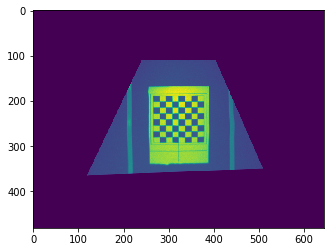

In [168]:
res = []
img = cv2.imread("1.png", 0)
ret, corners = cv2.findChessboardCorners(img, (nx, ny), None)
if ret == True:

    # If we found corners, draw them! (just for fun)
    #cv2.drawChessboardCorners(img, (6,4), corners, ret)
    # Choose offset from image corners to plot detected corners
    # This should be chosen to present the result at the proper aspect ratio
    # My choice of 100 pixels is not exact, but close enough for our purpose here
    #offset = 150 # offset for dst points
    # Grab the image shape
    img_size = (img.shape[1], img.shape[0])

    # For source points I'm grabbing the outer four detected corners
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    src = src.reshape((4,2))
    # For destination points, I'm arbitrarily choosing some points to be
    # a nice fit for displaying our warped result
    # again, not exact, but close enough for our purposes
    
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset],
                                 [img_size[0]-offset, img_size[1]-offset],
                                 [offset, img_size[1]-offset]])
    '''
    (tl, tr, br, bl) = src
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32"
    )
    '''
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    res.append(M)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    name = str(i) + "warped.jpg"
    plt.imshow(warped)

In [167]:
M

array([[  6.52302966e-01,   9.66215509e-01,   1.19650154e+02],
       [  1.04485574e-02,  -2.04455702e-01,   3.64134256e+02],
       [  9.49661686e-05,   2.96906872e-03,   1.00000000e+00]])

In [129]:
src.shape

(4, 1, 2)

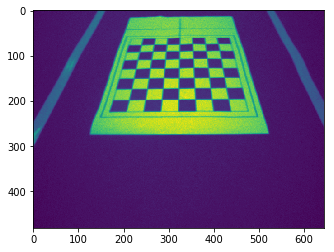

In [126]:
plt.imshow(img)